# Dislcaimer
This code is not my own. It is primarily follows along the guides from [learnds]('http://learnds.com/') as a way for me to learn and practice.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [43]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('../datasets/loanf.csv')

In [11]:
df.columns

Index(['Interest.Rate', 'FICO.Score', 'Loan.Length', 'Monthly.Income',
       'Loan.Amount'],
      dtype='object')

In [6]:
intrate = df['Interest.Rate']
fico = df['FICO.Score']

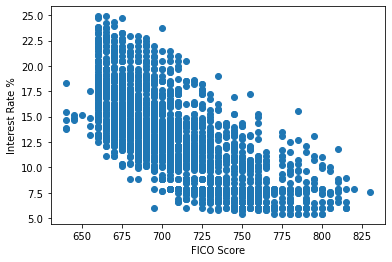

In [9]:
p = plot(fico,intrate,'o')
ax = gca()
xt = ax.set_xlabel('FICO Score')
yt = ax.set_ylabel('Interest Rate %')

In [13]:
%matplotlib inline

In [98]:
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [15]:
loansData['Interest.Rate'][0:5]

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object

In [16]:
loansData['Loan.Length'][0:5]

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object

In [17]:
loansData['FICO.Range'][0:5]

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object

In [99]:
## Cleaning data
## Remove % symbol in interest rates
loansData = loansData.replace(to_replace="%", value="", regex=True)
## Remove 'months'
loansData = loansData.replace(to_replace=" months", value="", regex=True)
## Take lower bound of FICO range
loansData['FICO.Range'] = [r[:r.index('-')] for r in loansData['FICO.Range']]
## Drop NaN entries
loansData.dropna()
## Drop outliers for monthly income
loansData = loansData[(np.abs(stats.zscore(loansData['Monthly.Income'], nan_policy='omit')) < 3)]

In [100]:
loansData

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.00,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735,14.0,14272.0,2.0,< 1 year
99592,19200,19200.00,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715,12.0,11140.0,1.0,2 years
80059,35000,35000.00,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690,14.0,21977.0,1.0,2 years
15825,10000,9975.00,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695,10.0,9346.0,0.0,5 years
33182,12000,12000.00,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23735,30000,29950.00,16.77,60,debt_consolidation,19.23,NY,MORTGAGE,9250.00,705,15.0,45880.0,1.0,8 years
65882,16000,16000.00,14.09,60,home_improvement,21.54,MD,OWN,8903.25,740,18.0,18898.0,1.0,10+ years
55610,10000,10000.00,13.99,36,debt_consolidation,4.89,PA,MORTGAGE,2166.67,680,4.0,4544.0,0.0,10+ years
38576,6000,6000.00,12.42,36,major_purchase,16.66,NJ,RENT,3500.00,675,8.0,7753.0,0.0,5 years


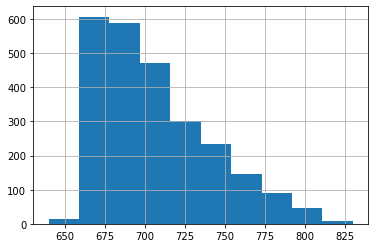

In [108]:
import matplotlib.pyplot as plt
plt.figure()
loansmin = pd.read_csv('../datasets/loanf.csv')
fico = loansmin['FICO.Score']
p = fico.hist()

Text(0.5, 1.0, '                          ')

<Figure size 432x288 with 0 Axes>

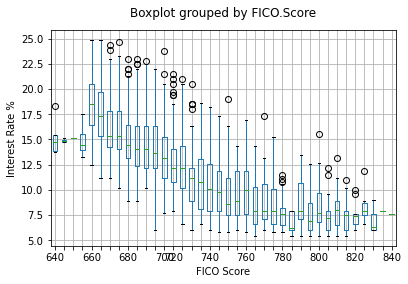

In [111]:
plt.figure()
p = loansmin.boxplot('Interest.Rate', 'FICO.Score') # param names for axes are just raw col names
q = p.set_xticklabels(['640','','','','660','','','','680','','','','700',
  '720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])

p.set_xlabel('FICO Score')
p.set_ylabel('Interest Rate %')
p.set_title('                          ')

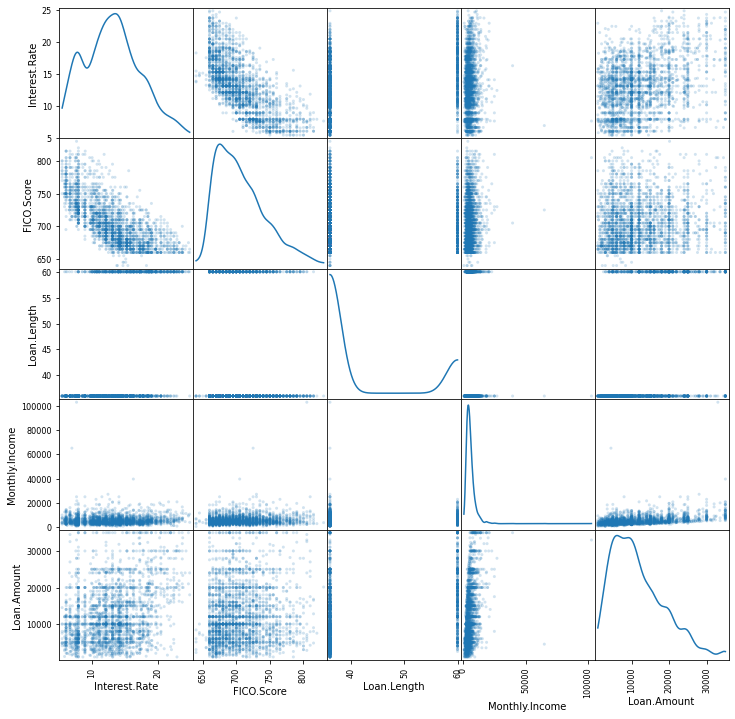

In [116]:
a = pd.plotting.scatter_matrix(loansmin,alpha=0.2,figsize=(12,12),diagonal='kde')

In [120]:
%pylab inline
import pylab as pl
import statsmodels.api as sm

df = pd.read_csv('../datasets/loanf.csv')

intrate = df['Interest.Rate']
loanamt = df['Loan.Amount']
fico = df['FICO.Score']

y = np.matrix(intrate).transpose()
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

x = np.column_stack([x1, x2])

X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

print ('Coefficients: ', f.params[0:2])
print ('Intercept: ', f.params[2])
print ('P-Values: ', f.pvalues)
print ('R-Squared: ', f.rsquared)

Populating the interactive namespace from numpy and matplotlib
Coefficients:  [72.88279832 -0.08844242]
Intercept:  0.00021074776854833856
P-Values:  [0.00000000e+000 0.00000000e+000 5.96972978e-203]
R-Squared:  0.6566326246493588
